In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/saleh.abdallah/Downloads/ds_jobs/ds_jobs.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


<h2>Data Cleaning and Transformation</h2>
Will begin cleaning our dataset starting from the first column onwards.

In [6]:
df.isnull().sum()   # check for null values

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

<h3>Drop the index column</h3>

In [7]:
df.drop('index', axis = 1, inplace = True)
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"


In [8]:
df['Job Title'].nunique()

172

In [9]:
df['Job Title'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

<h3>Create a new job title field</h3>
As we can see there are a lot of job titles and we will try to minimize the options into a new field called 'job title'.

In [10]:
# Below is a function to filter the job titles by position for all records; and job level for only data science jobs.

def job_type(title):
    if 'data scientist' in title.lower() and ('sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'manager' in title.lower()):
        return 'sr data scientist'
    elif 'data science' in title.lower() and ('sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'manager' in title.lower()):
        return 'sr data scientist'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data science' in title.lower():
        return 'data scientist'
    elif 'business' in title.lower():
        return 'bi analyst'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'big data' in title.lower():
        return 'big data analyst'
    elif 'machine learning' in title.lower():
        return 'ml engineer'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data architect' in title.lower():
        return 'data engineer'
    elif 'research' in title.lower():
        return 'research analyst'
    elif 'analytics' in title.lower():
        return 'ml engineer'
    else:
        return 'other'

In [11]:
# Apply the funtion to the new job title field

df['job title'] = df['Job Title'].apply(job_type)

In [12]:
# The total positionsnow is 9 instead 172

df['job title'].nunique()

9

In [13]:
# Check the new job titles

df['job title'].unique()

array(['sr data scientist', 'data scientist', 'other', 'data analyst',
       'bi analyst', 'data engineer', 'ml engineer', 'research analyst',
       'big data analyst'], dtype=object)

In [14]:
# Drop the old Job Title field

df.drop('Job Title', axis = 1, inplace = True)
df.head(1)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job title
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",sr data scientist


<h3>Clean and transform the Salary Estimate field </h3>
1. Eliminate the text in brackets <br>
2. Remove the $ and K signsimp<br>
3. Create new min salary and max salary columns<br>
4. Calculate the average salary<br>
5. Drop the old Salary Estimate field

In [15]:
df['salary'] = df['Salary Estimate'].apply(lambda x: x.split('(')[0].replace('$','').replace('K',''))   # remove the text in brackets + the $ and K signs
df['salary'].head(1)

0    137-171 
Name: salary, dtype: object

In [16]:
df['min salary'] = df['salary'].apply(lambda x: int(x.split('-')[0]))    # create a new min salary field and change the data type from object to int
df['max salary'] = df['salary'].apply(lambda x: int(x.split('-')[1]))    # create a new max salary field and change the data type from object to int
df['avg salary'] = (df['min salary'] + df['max salary'])//2              # create a new avergage salary field
df[['salary', 'min salary', 'max salary', 'avg salary']].head(1)

,salary,min salary,max salary,avg salary
0,137-171,137,171,154


<h3>Scan the Job Description column to check what are the highest tech skills in demand for the data science jobs</h3>

In [17]:
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)           # check if excel is mentioned in the job description
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)         # check if python is mentioned in the job description
df['tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)       # check if tableau is mentioned in the job description
df['power bi'] = df['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)     # check if power bi is mentioned in the job description
df['hadoop'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)         # check if hadoop is mentioned in the job description
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)           # check if spark is mentioned in the job description
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)               # check if aws is mentioned in the job description
df['azure'] = df['Job Description'].apply(lambda x: 1 if 'azure' in x.lower() else 0)           # check if azure is mentioned in the job description

df.head(1)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,max salary,avg salary,excel,python,tableau,power bi,hadoop,spark,aws,azure
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,...,171,154,0,0,0,0,0,0,1,1


<h3> Clean and create a new company name field using the 'Company Name'</h3>

In [18]:
df['comp_name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
df.head(1)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,avg salary,excel,python,tableau,power bi,hadoop,spark,aws,azure,comp_name
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,...,154,0,0,0,0,0,0,1,1,Healthfirst


<h3>Create 2 new columns 'city' and 'state' using the Location column </h3>

In [19]:
df['city'] = df['Location'].apply(lambda x: x.split(',')[0])
df['state'] = df['Location'].apply(lambda x: x.split(',')[-1])
df.head(1)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,python,tableau,power bi,hadoop,spark,aws,azure,comp_name,city,state
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,...,0,0,0,0,0,1,1,Healthfirst,New York,NY


In [20]:
df['state'].unique()

array([' NY', ' VA', ' MA', ' CA', ' IL', ' MO', ' WA', ' DC', 'Remote',
       ' TN', ' TX', ' PA', ' AZ', ' WI', ' GA', ' FL', 'United States',
       ' NE', ' KS', ' NH', ' NJ', ' LA', ' OH', ' IN', ' MD', ' CO',
       'Utah', 'New Jersey', ' UT', ' OR', ' MI', ' SC', ' MS', ' AL',
       ' RI', ' IA', ' MN', ' OK', ' CT', ' NC', 'Texas', ' DE',
       'California', ' WV'], dtype=object)

In [21]:
df['state'] = df['state'].apply(lambda x: 'UT' if 'utah' in x.lower() else x) 
df['state'] = df['state'].apply(lambda x: 'TX' if 'texas' in x.lower() else x) 
df['state'].unique()

array([' NY', ' VA', ' MA', ' CA', ' IL', ' MO', ' WA', ' DC', 'Remote',
       ' TN', ' TX', ' PA', ' AZ', ' WI', ' GA', ' FL', 'United States',
       ' NE', ' KS', ' NH', ' NJ', ' LA', ' OH', ' IN', ' MD', ' CO',
       'UT', 'New Jersey', ' UT', ' OR', ' MI', ' SC', ' MS', ' AL',
       ' RI', ' IA', ' MN', ' OK', ' CT', ' NC', 'TX', ' DE',
       'California', ' WV'], dtype=object)

<h3>Find and create a new company age field using the 'Founded' field </h3>

In [22]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962], dtype=int64)

In [23]:
df['comp_age'] = df['Founded'].apply(lambda x: x if x < 1 else 2022 - x)
df.head(1)

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,tableau,power bi,hadoop,spark,aws,azure,comp_name,city,state,comp_age
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,...,0,0,0,0,1,1,Healthfirst,New York,NY,29


<h2> Exploratory Data Analysis - EDA </h2>

In [99]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
import seaborn as sns
%matplotlib inline

In [27]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,tableau,power bi,hadoop,spark,aws,azure,comp_name,city,state,comp_age
0,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,...,0,0,0,0,1,1,Healthfirst,New York,NY,29
1,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,...,0,0,1,0,0,0,ManTech,Chantilly,VA,54
2,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,...,0,0,0,0,1,0,Analysis Group,Boston,MA,41
3,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,...,0,0,0,0,1,0,INFICON,Newton,MA,22
4,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,...,0,0,0,0,0,0,Affinity Solutions,New York,NY,24


In [29]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'job title', 'salary',
       'min salary', 'max salary', 'avg salary', 'excel', 'python', 'tableau',
       'power bi', 'hadoop', 'spark', 'aws', 'azure', 'comp_name', 'city',
       'state', 'comp_age'],
      dtype='object')

<h3>Check the number of Data Sciebce Jobs</h3>

Text(0.5, 1.0, 'Data Science Professions Count')

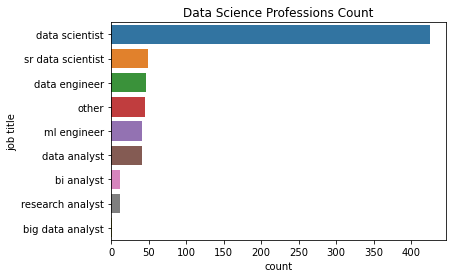

In [109]:
sns.countplot(data = df, y ='job title', order = df['job title'].value_counts().index).set_title('Data Science Professions Count')

In [85]:
df['job title'].value_counts()

data scientist       425
sr data scientist     49
data engineer         46
other                 45
ml engineer           41
data analyst          41
bi analyst            12
research analyst      12
big data analyst       1
Name: job title, dtype: int64

<h3>Check the most required skills for Data Sciebce Jobs</h3>

In [62]:
excel = df['excel'].sum()
python = df['python'].sum()
tableau = df['tableau'].sum()
power_bi = df['power bi'].sum()
hadoop = df['hadoop'].sum()
spark = df['spark'].sum()
aws = df['aws'].sum()
azure = df['azure'].sum()
skills = {'excel': excel, 'python' : python, 'tableau' : tableau, 'power_bi': power_bi, 'hadoop': hadoop, 'spark': spark, 'aws': aws, 'azure': azure}


In [86]:
skills

{'excel': 296,
 'python': 491,
 'tableau': 123,
 'power_bi': 34,
 'hadoop': 143,
 'spark': 189,
 'aws': 174,
 'azure': 50}

In [71]:
df_skills = pd.DataFrame(list(skills.items()),columns = ['Skill','Count'])
df_skills

,Skill,Count
0,excel,296
1,python,491
2,tableau,123
3,power_bi,34
4,hadoop,143
5,spark,189
6,aws,174
7,azure,50


Text(0.5, 1.0, 'Data Science Skills')

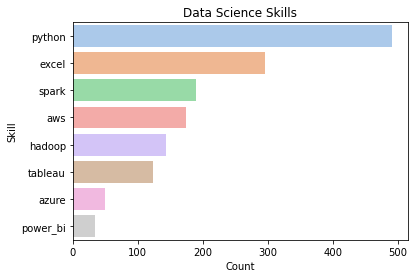

In [101]:
sns.barplot(data=df_skills, x='Count', y='Skill', palette='pastel', ci = None, orient = 'h', order=df_skills.sort_values('Count', ascending=False).Skill).set_title('Data Science Skills')

<h3>Check if there is a correlation between the average salary and the rating or the age of the company</h3>

<AxesSubplot:xlabel='comp_age', ylabel='avg salary'>

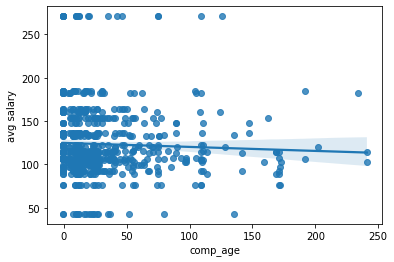

In [104]:
sns.regplot(data=df, x='comp_age', y='avg salary')      # No correlation

<AxesSubplot:xlabel='Rating', ylabel='avg salary'>

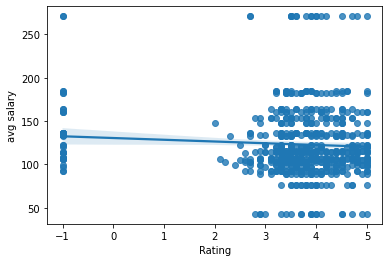

In [106]:
sns.regplot(data=df, x='Rating', y='avg salary')       # No correlation

<h3>Check the top and bottom 10 companies by average salary</h3>

In [151]:
df[['comp_name', 'avg salary']].head(10)

,comp_name,avg salary
0,Healthfirst,154
1,ManTech,154
2,Analysis Group,154
3,INFICON,154
4,Affinity Solutions,154
5,HG Insights,154
6,Novartis,154
7,iRobot,154
8,Intuit - Data,154
9,XSELL Technologies,154


In [147]:
df[['comp_name', 'avg salary']].tail(10)

,comp_name,avg salary
662,"SolutionIT, Inc.",136
663,A-Line Staffing Solutions,136
664,Clear Ridge Defense,136
665,"Criterion Systems, Inc.",136
666,Foundation Medicine,136
667,TRANZACT,136
668,JKGT,136
669,AccessHope,136
670,ChaTeck Incorporated,136
671,1-800-Flowers,136
